In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy import stats as st

In [2]:
dataset = pd.read_csv('dataset_bascula.csv')

In [3]:
data = dataset.drop(columns=['Mes', 'fecha', 'Grupo', 'Hora','% AR jugo', 'Glucobrix','Acidez', 'Pol caña',
                             'Humedad caña', 'Calidad Caña', 'Brix caña', 'Pza. caña','ENVIO'])

## Exploración de Datos 

In [4]:
data.head()

,Semana,Estrato,Brix jugo,Pol jugo,Pureza jugo,% Jugo,Rdto. Pol Bascula,% Fibra caña,Variedad
0,1,BAJO,16.78,13.76,82.00,71.15,114.45,13.15,CP 731547
1,1,BAJO,17.21,13.87,80.59,68.42,110.94,14.39,CP 731547
2,1,BAJO,16.06,13.63,84.87,72.84,116.06,12.38,CP 731547
3,1,BAJO,17.71,14.72,83.12,71.18,122.48,13.14,CP 731547
4,1,BAJO,18.56,15.38,82.87,71.44,128.44,13.02,CP 731547


In [5]:
data.count()

Semana               24030
Estrato              23830
Brix jugo            24030
Pol jugo             24030
Pureza jugo          24030
% Jugo               24030
Rdto. Pol Bascula    24030
% Fibra caña         24030
Variedad             24030
dtype: int64

In [6]:
data.Estrato.isna().sum()

200

In [7]:
(200/24030)*100

0.8322929671244279

Hay un total de 24030 en la mayoría de columnas excepto en la de estrato donde hay un total de 200 datos menos. Estos datos representan menos del 1% de los datos de todo el dataset, por lo que se eliminaran los de datos estas filas, ya que representan una parte muy pequeña del dataset.

In [8]:
data = data.dropna()

In [9]:
data.count()

Semana               23830
Estrato              23830
Brix jugo            23830
Pol jugo             23830
Pureza jugo          23830
% Jugo               23830
Rdto. Pol Bascula    23830
% Fibra caña         23830
Variedad             23830
dtype: int64

In [10]:
data.describe()

,Semana,Brix jugo,Pol jugo,Pureza jugo,% Jugo,Rdto. Pol Bascula,% Fibra caña
count,23830.000000,23830.000000,23830.000000,23830.000000,23830.000000,23830.000000,23830.000000
mean,13.103861,17.426491,14.158395,81.121895,70.388285,118.240634,13.344172
std,7.017750,1.641391,1.647671,3.487328,2.427012,14.015970,1.269979
min,1.000000,7.330000,4.520000,52.320000,29.450000,21.870000,9.650000
25%,7.000000,16.350000,13.080000,79.100000,69.080000,109.130000,12.460000
50%,13.000000,17.430000,14.180000,81.410000,70.630000,118.450000,13.210000
75%,19.000000,18.480000,15.250000,83.450000,72.010000,127.620000,14.087500
max,25.000000,27.030000,22.570000,99.000000,77.150000,174.370000,30.260000


In [11]:
data.dtypes

Semana                 int64
Estrato               object
Brix jugo            float64
Pol jugo             float64
Pureza jugo          float64
% Jugo               float64
Rdto. Pol Bascula    float64
% Fibra caña         float64
Variedad              object
dtype: object

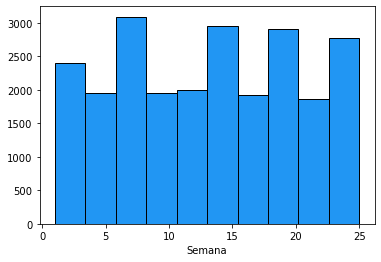

In [12]:
plt.hist(data['Semana'], color='#2196f3',ec='black')
plt.xlabel('Semana')
plt.show()

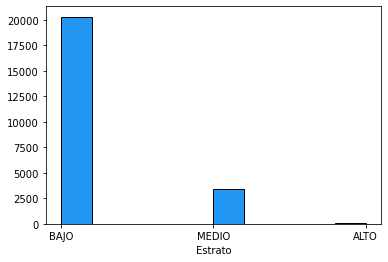

In [13]:
plt.hist(data['Estrato'], color='#2196f3',ec='black')
plt.xlabel('Estrato')
plt.show()

In [14]:
data['Variedad'].value_counts()

CP 722086      7574
CP 731547      3023
SP 716161      1737
VARIAS         1627
CG 02-163      1566
SP 791287      1388
CP 881165      1341
CG 9878         977
CG 9846         854
MEX 79-431      801
RB 732577       664
SP 83-2847      594
CG 9810         320
PR 67-1355      242
RB 845210       188
CG 00-033       183
CP 01-1341      136
PGM 89968       118
RB 84-5210      117
MEX 68P23       112
RB 732908        45
PR 87-2080       39
CP 931017        27
CP 021564        23
CP 892143        22
PR 752002        21
CG 01-53         20
CG 00-102        20
CG 9640          16
CP 01-1564       13
RB 721012         8
CG 03-025         5
CP 97-1931        4
SP 80-1842        3
CG 05-12517       2
Name: Variedad, dtype: int64

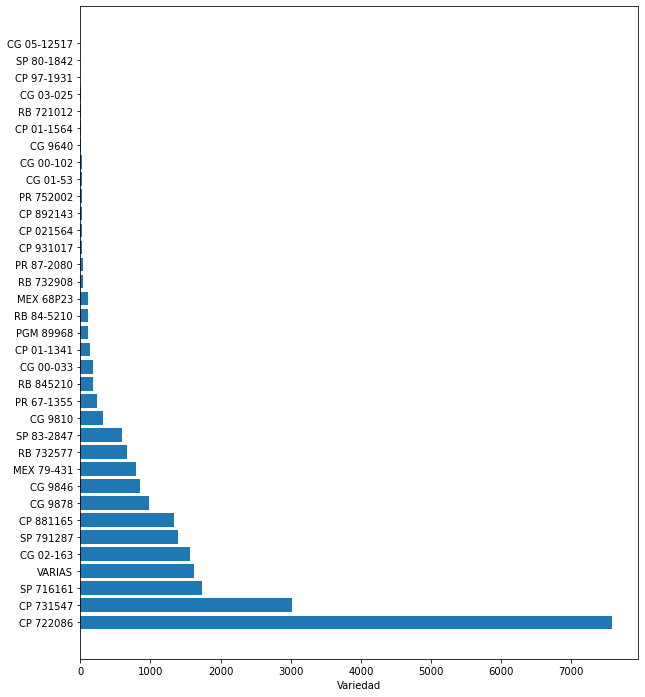

In [15]:
frequency = data['Variedad'].value_counts()
plt.figure(figsize=(10, 12))
plt.xlabel('Variedad')
plt.barh(frequency.index, width=frequency)
plt.show()

Gráfica de barras para mostrar la frecuencia de las distintas variedades.

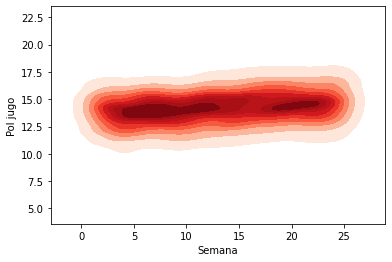

In [16]:
_ = sns.kdeplot(x=data['Semana'], 
            y=data['Pol jugo'],
            color='r', shade=True,
            cmap="Reds", thresh=0.05)

Esta gráfica nos ayuda a ver la distribución de probabilidad entre las variables de semana y la polarización del jugo

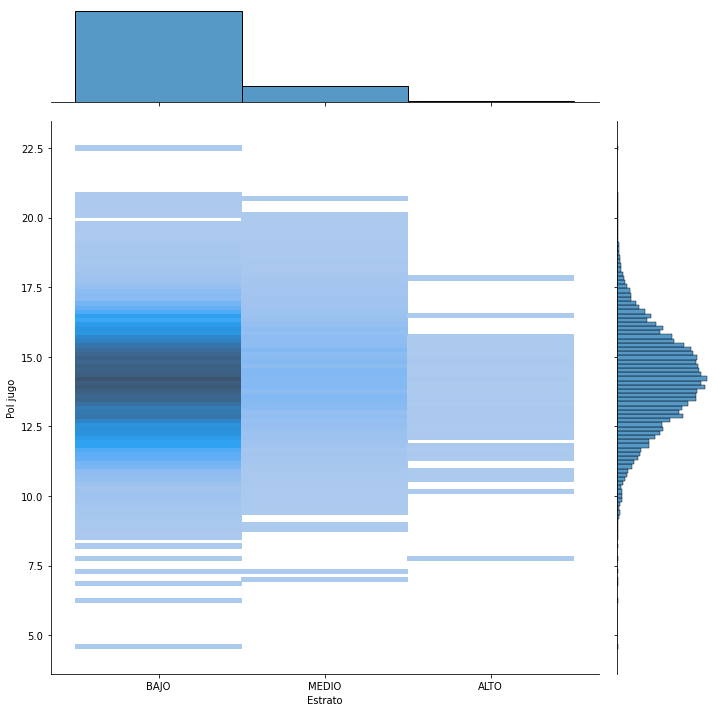

In [17]:
_ = sns.jointplot(x='Estrato', y='Pol jugo', data=data, kind='hist', height=10)

En esta gráfica se puede ver la relación de cada uno de los estratos con la polarización del jugo, para ver como en donde que polarización se encuentran la mayoría de datos dependiendo del estrato.

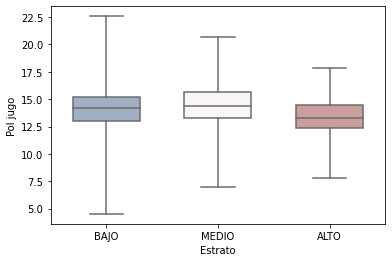

In [18]:
_ = sns.boxplot(x="Estrato", y="Pol jugo", data=data,
                whis=[0, 100], width=.6, palette="vlag")

Aquí se puede ver la concentración de los datos para cada estrato en relación a su polarización de jugo, para ver la media de cada estrato.

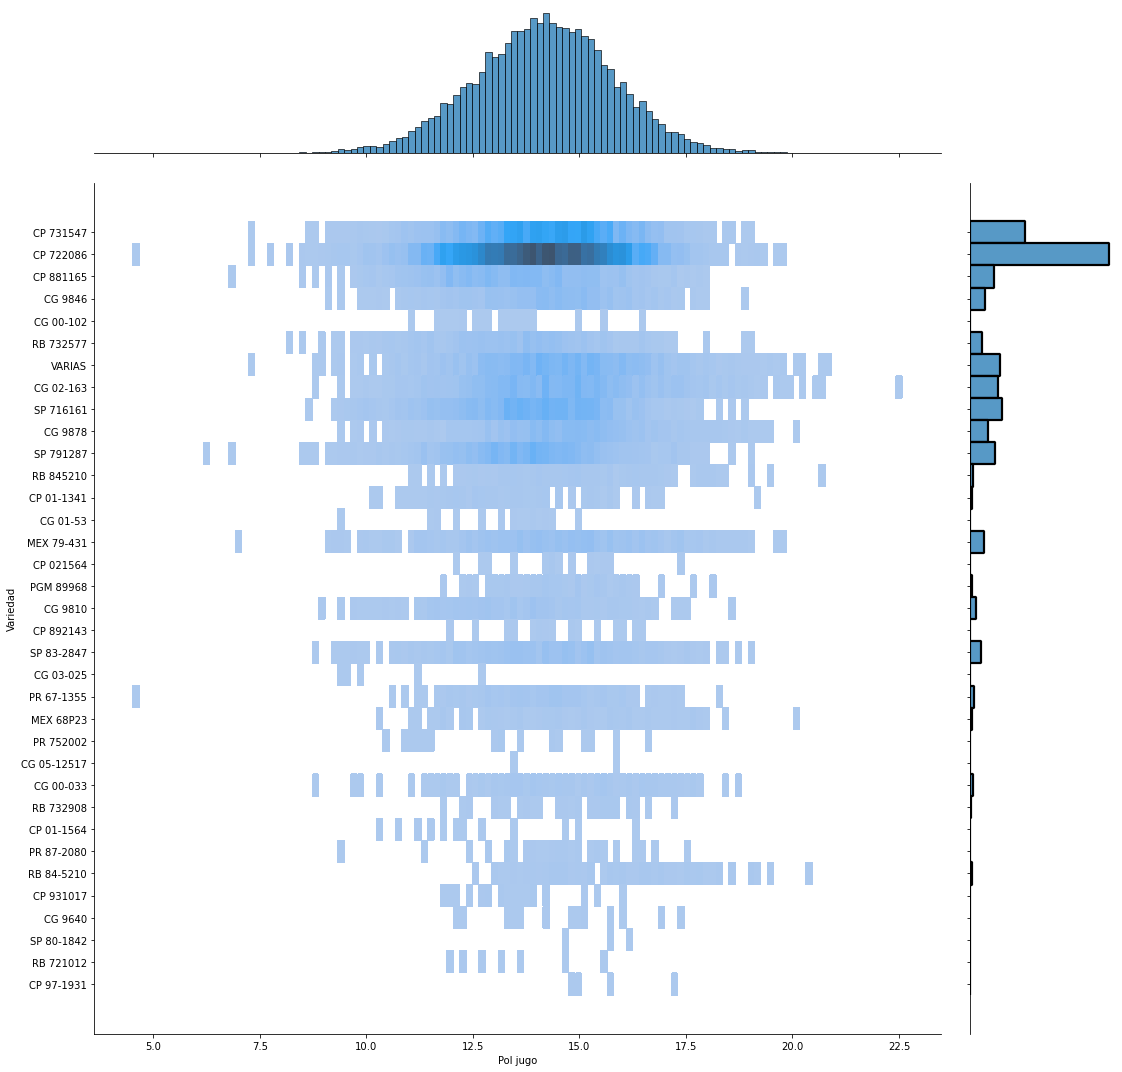

In [19]:
_ = sns.jointplot(x='Pol jugo', y='Variedad', data=data, height=15, kind='hist')

En esta gráfica se puede observar la polaricación del jugo con respecto de la variedad de la caña y ver como se distibuyeron todos los datos de polarización de jugo de cada variedad.

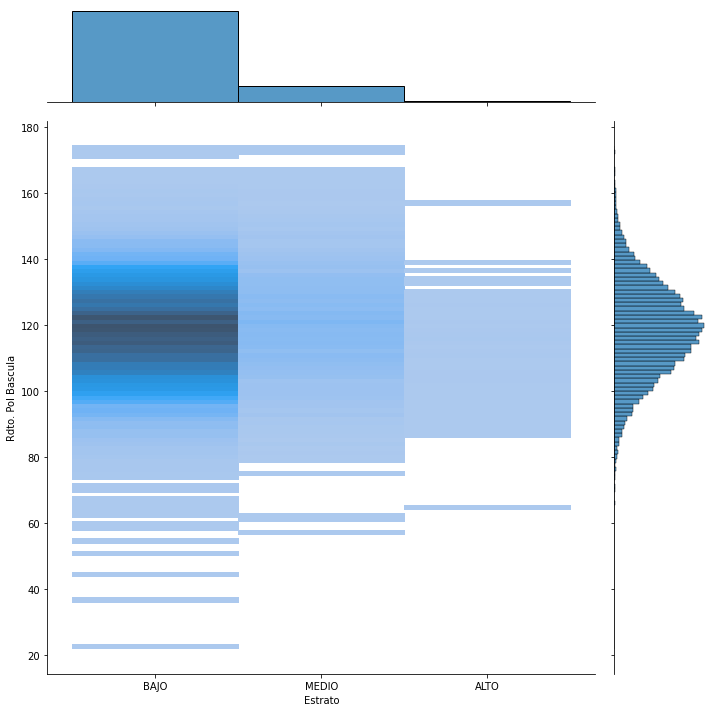

In [20]:
_ = sns.jointplot(y='Rdto. Pol Bascula', x='Estrato', data=data, height=10, kind='hist')

La gráfica nos muestra la distribución de los datos de cada estrato con respecto del rendimiento.

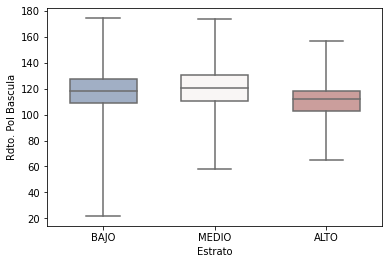

In [21]:
_ = sns.boxplot(x="Estrato", y="Rdto. Pol Bascula", data=data,
            whis=[0, 100], width=.6, palette="vlag")

Aquí se puede ver la concentración de los datos de cada estrato con repecto del rendimiento.

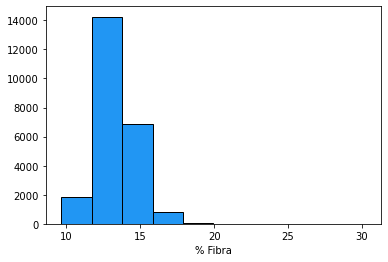

In [22]:
plt.hist(data['% Fibra caña'], color='#2196f3',ec='black')
plt.xlabel('% Fibra')
plt.show()

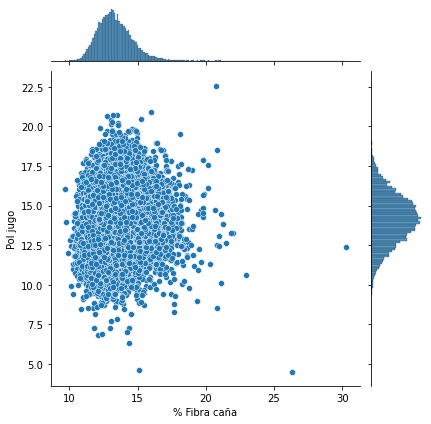

In [23]:
_ = sns.jointplot(x='% Fibra caña', y='Pol jugo', data=data)

En esta gráfica podemos ver la distribución entre la polarización del jugo con el % de fibra de la caña.

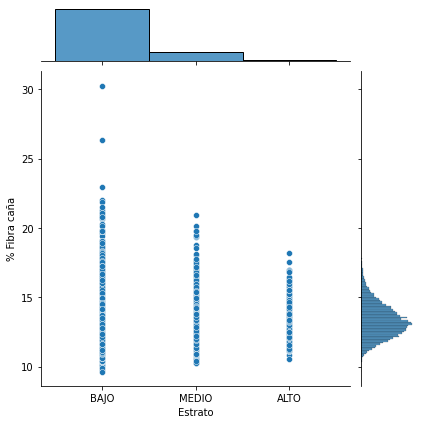

In [24]:
_ = sns.jointplot(y='% Fibra caña', x='Estrato', data=data)

Aquí esta representada la distribución de los datos de los distintos estratos y el porcentaje de fibra.

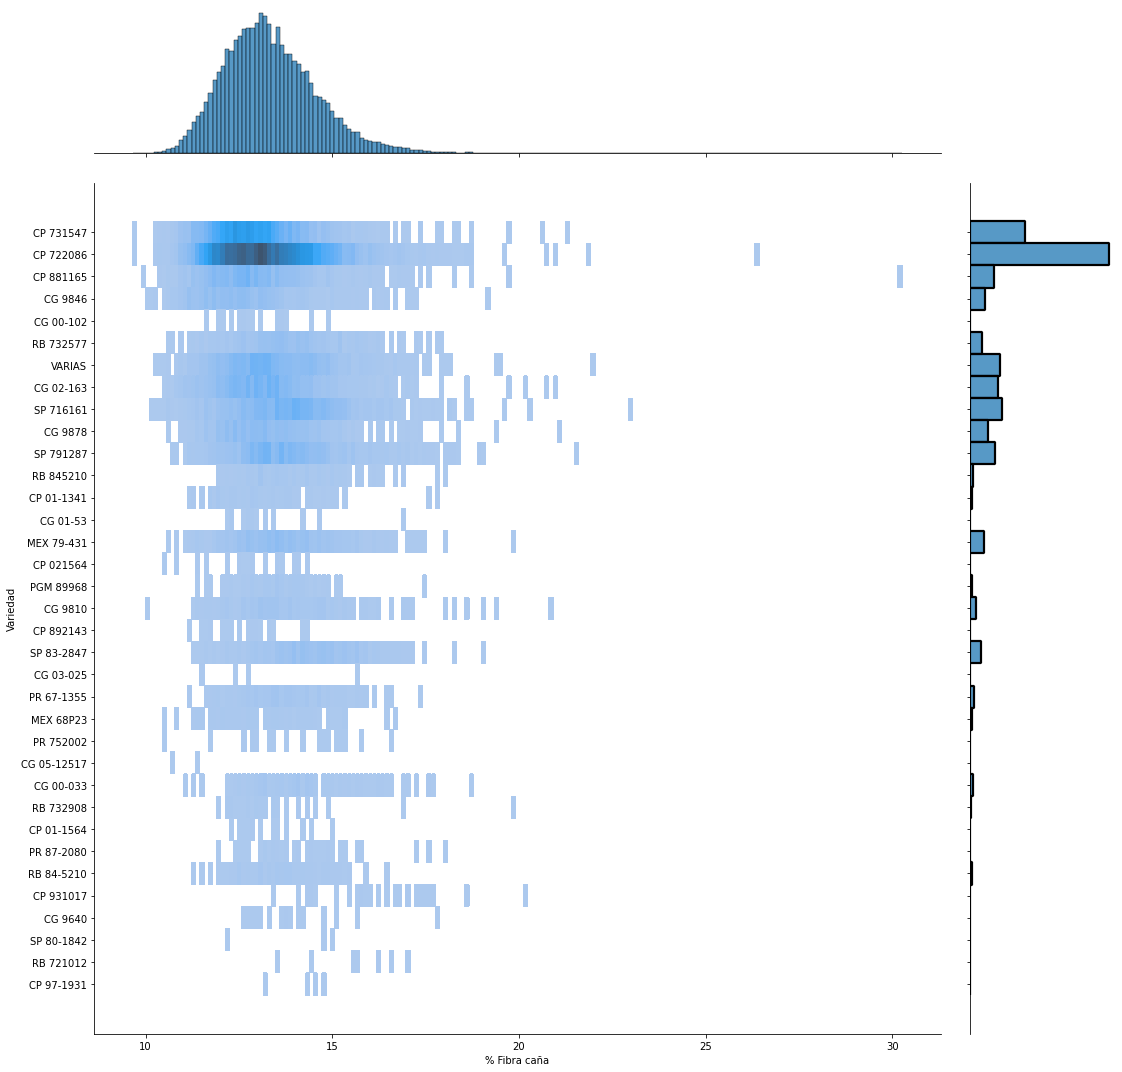

In [25]:
_ = sns.jointplot(x='% Fibra caña', y='Variedad', data=data, height=15, kind='hist')

Esta gráfica nos muestra como los datos de cada variedad se distribuyeron dependiendo del porcentaje de fibra de la caña.

In [26]:
data.corr()

,Semana,Brix jugo,Pol jugo,Pureza jugo,% Jugo,Rdto. Pol Bascula,% Fibra caña
Semana,1.000000,0.356534,0.205991,-0.219228,-0.151381,0.066195,0.421770
Brix jugo,0.356534,1.000000,0.938854,0.378894,-0.077862,0.858463,0.178273
Pol jugo,0.205991,0.938854,1.000000,0.671700,-0.036356,0.944153,0.102457
Pureza jugo,-0.219228,0.378894,0.671700,1.000000,0.065370,0.693383,-0.104530
% Jugo,-0.151381,-0.077862,-0.036356,0.065370,1.000000,0.261679,-0.921036
Rdto. Pol Bascula,0.066195,0.858463,0.944153,0.693383,0.261679,1.000000,-0.217949
% Fibra caña,0.421770,0.178273,0.102457,-0.104530,-0.921036,-0.217949,1.000000


Tabla de correlaciones entre las distintas variables numéricas

In [27]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

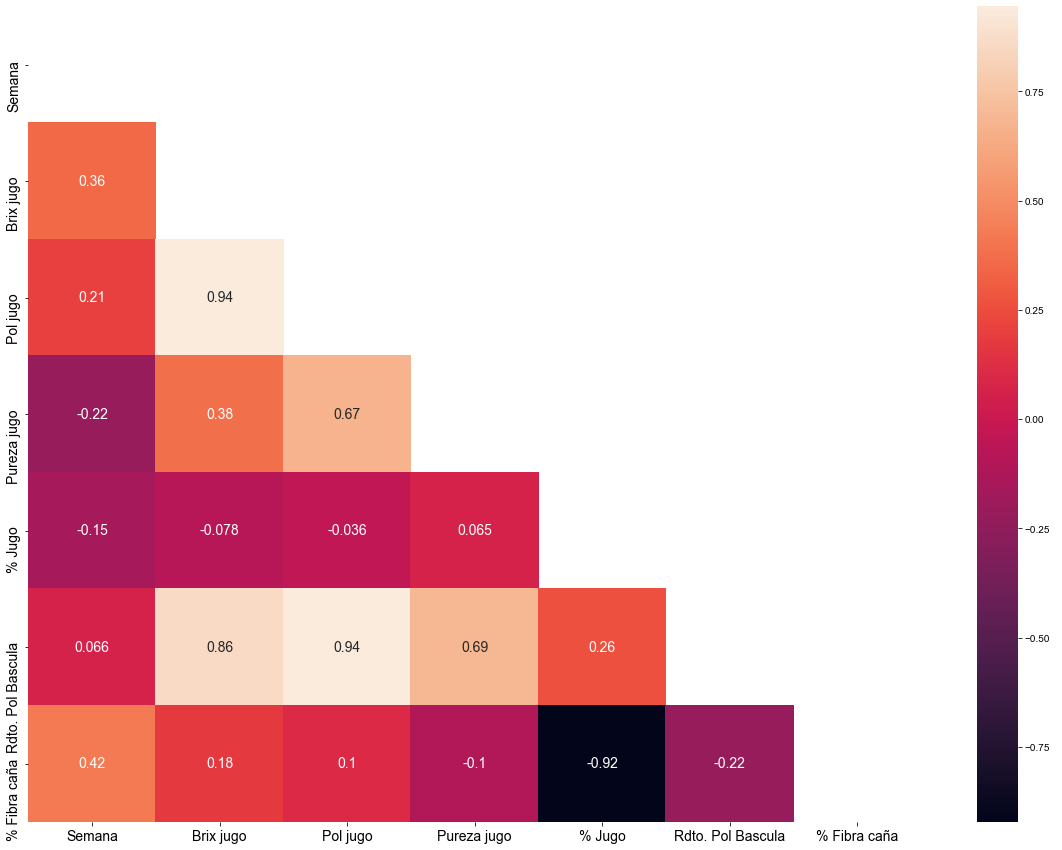

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Mapa de calor en donde se representan las correlaciones entre las distintas variables numéricas.

# Regresión Multivariable
_______________________________________

Hipótesis: La polarización del jugo de la caña de azúcar tiene una relación directa con el brix del jugo, pureza de jugo, % jugo y % fibra.

In [87]:
bj = data['Brix jugo'].var()
pj = data['Pureza jugo'].var()
porj = data['% Jugo'].var()
fc = data['% Fibra caña'].var()

pd.DataFrame({'Brix jugo': [bj], 'Pureza jugo': [pj], '% Jugo': [porj], '% Fibra caña': [fc]}, index=['Varianza'])

,Brix jugo,Pureza jugo,% Jugo,% Fibra caña
Varianza,2.694165,12.161455,5.890386,1.612848


In [89]:
bj25 = st.scoreatpercentile(data['Brix jugo'].values, 25) 
bj50 = st.scoreatpercentile(data['Brix jugo'].values, 50)
bj75 = st.scoreatpercentile(data['Brix jugo'].values, 75)

pj25 = st.scoreatpercentile(data['Pureza jugo'].values, 25)
pj50 = st.scoreatpercentile(data['Pureza jugo'].values, 50)
pj75 = st.scoreatpercentile(data['Pureza jugo'].values, 75)

porj25 = st.scoreatpercentile(data['% Jugo'].values, 25)
porj50 = st.scoreatpercentile(data['% Jugo'].values, 50)
porj75 = st.scoreatpercentile(data['% Jugo'].values, 75)

porfb25 = st.scoreatpercentile(data['% Fibra caña'].values, 25)
porfb50 = st.scoreatpercentile(data['% Fibra caña'].values, 50)
porfb75 = st.scoreatpercentile(data['% Fibra caña'].values, 75)

pd.DataFrame({'Brix jugo': [bj25, bj50, bj75], 'Pureza jugo': [pj25, pj50, pj75], 
              '% Jugo': [porj25, porj50, porj75], '% Fibra caña': [porfb25, porfb50, porfb75]},
            index=['Cuartil 25', 'Cuartil 50', 'Cuartil 75'])

,Brix jugo,Pureza jugo,% Jugo,% Fibra caña
Cuartil 25,16.35,79.10,69.08,12.4600
Cuartil 50,17.43,81.41,70.63,13.2100
Cuartil 75,18.48,83.45,72.01,14.0875


## Data Training y Test 

In [29]:
pol_jugo = data['Pol jugo']
features = data.drop(columns=['Estrato', 'Variedad', 'Pol jugo', 'Rdto. Pol Bascula', 'Semana'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, pol_jugo, test_size=0.33, random_state=20)

In [30]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [31]:
print('Intercepto', regr.intercept_)

Intercepto -14.057052582436715


In [58]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coeficientes'])

,Coeficientes
Brix jugo,0.107089
Pureza jugo,0.023743
% Jugo,0.000237
% Fibra caña,0.000047


$\hat y = \theta_0 + \theta_1 x_1 + ... +  \theta_n x_n $ 

$\hat Pol jugo = \theta_0 + \theta_1 BrixJugo + \theta_2 PurezaJugo +  \theta_3 \% jugo + \theta_4 \% FibraCaña $ 

$\hat Pol jugo = -14.1 + (0.10)BrixJugo + (0.02)PurezaJugo + (0.0002)\% jugo + (0.00004)\% FibraCaña $ 

In [33]:
print("r cuadrado de data de entrenamiento: ", regr.score(X_train, y_train))
print("r cuadrado de data de evaluación: ", regr.score(X_test, y_test))

r cuadrado de data de entrenamiento:  0.9979891562800951
r cuadrado de data de evaluación:  0.9980968735081985


In [34]:
pol_jugo.skew()

-0.06943741872715196

### p values & Evaluating coefficients

In [35]:
X_incl_const = sm.add_constant(X_train)

#Ordinary Least Squares
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'Coef': results.params, 'P-values': round(results.pvalues, 3)})

,Coef,P-values
const,-14.057053,0.000
Brix jugo,0.801497,0.000
Pureza jugo,0.174167,0.000
% Jugo,0.001486,0.023
% Fibra caña,0.001145,0.371


### Multicolinealidad

In [36]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.3529072630357064

In [37]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(len(X_incl_const.columns))]
pd.DataFrame({'Feature': X_incl_const.columns, 'VIF': np.around(vif, 1)})

,Feature,VIF
0,const,12039.8
1,Brix jugo,1.4
2,Pureza jugo,1.3
3,% Jugo,7.1
4,% Fibra caña,7.5


## Model simplfification & Bayes Information Criteria

In [59]:
# Modelo original con todos los features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

original_coef = pd.DataFrame({'Coef': results.params, 'P-values': round(results.pvalues, 3)})
print(results.bic)
print(results.rsquared)

-114569.92237684627
0.9990986358400552


In [67]:
# Modelo reducido excluyendo % Fibra caña
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['% Fibra caña'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'Coef': results.params, 'P-values': round(results.pvalues, 4)})
print(results.bic)
print(results.rsquared)

-114579.43550523472
0.9990986265199067


In [68]:
frames = [original_coef, reduced_coef] 
pd.concat(frames, axis=1)

,Coef,P-values,Coef,P-values
const,-0.053303,0.000,-0.051081,0.0
Brix jugo,0.107089,0.000,0.107094,0.0
Pureza jugo,0.023743,0.000,0.023742,0.0
% Jugo,0.000237,0.000,0.000215,0.0
% Fibra caña,0.000047,0.685,NaN,NaN


## Residual & Residual Plots

In [41]:
# Modelo modificado: simplificado al eliminar dos features
pol_jugo = data['Pol jugo']
features = data.drop(columns=['Estrato', 'Variedad', 'Pol jugo', 'Rdto. Pol Bascula', 'Semana', '% Jugo'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, pol_jugo, test_size=0.33)

In [42]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

In [43]:
residuals = y_train - results.fittedvalues
# results.resid
residuals.describe()

count    1.596600e+04
mean    -9.857189e-15
std      7.245316e-02
min     -1.261062e+00
25%     -2.872189e-02
50%     -1.503817e-02
75%      1.621564e-02
max      1.953461e+00
dtype: float64

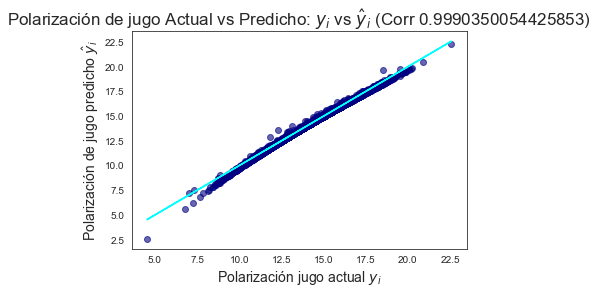

In [44]:
# Grafica de Pol jugo actual vs predicho
corr = y_train.corr(results.fittedvalues)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Polarización jugo actual $y _i$', fontsize=14)
plt.ylabel('Polarización de jugo predicho $\hat y_i$', fontsize=14)
plt.title(f'Polarización de jugo Actual vs Predicho: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

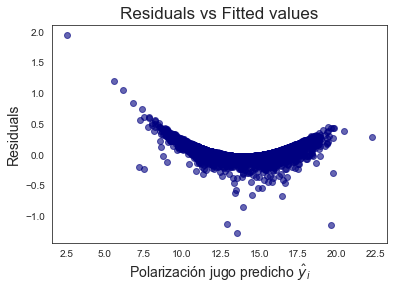

In [45]:
# Residual vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Polarización jugo predicho $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=17)
plt.show()

In [46]:
mse = results.mse_resid
r2 = results.rsquared
r2a = results.rsquared_adj
pd.DataFrame({'R-Squared': [r2], 'R-Squared Adjusted': [r2a], 'MSE': [mse], 'RMSE': [np.sqrt(mse)]}, index=[''])

,R-Squared,R-Squared Adjusted,MSE,RMSE
,0.998071,0.998071,0.00525,0.07246


### Transformación de data

In [69]:
y_sqrt = np.sqrt(data['Pol jugo'])

$sqrt(\hat Pol jugo) = \theta_0 + \theta_1 BrixJugo + \theta_2 PurezaJugo +  \theta_3 \% jugo + \theta_4 \% FibraCaña $ 

### Regresion usando sqrt

In [72]:
pol_jugo = y_sqrt
features = data.drop(columns=['Estrato', 'Variedad', 'Pol jugo', 'Rdto. Pol Bascula', 'Semana'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, pol_jugo, test_size=0.33, random_state=20)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercepto', regr.intercept_)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coeficientes'])

Intercepto -0.05330324518709251


,Coeficientes
Brix jugo,0.107089
Pureza jugo,0.023743
% Jugo,0.000237
% Fibra caña,0.000047


$sqrt(\hat Pol jugo) = -14.1 + (0.10)BrixJugo + (0.02)PurezaJugo + (0.0002)\% jugo + (0.00004)\% FibraCaña $ 

In [50]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

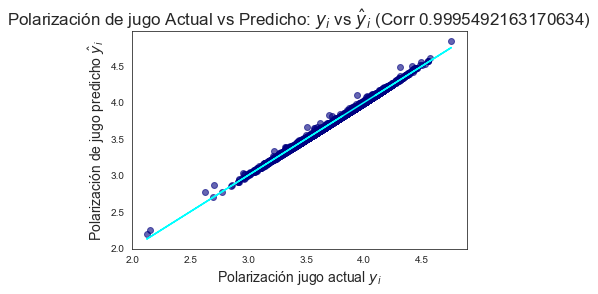

In [51]:
# Grafica de Pol jugo actual vs predicho
corr = y_train.corr(results.fittedvalues)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Polarización jugo actual $y _i$', fontsize=14)
plt.ylabel('Polarización de jugo predicho $\hat y_i$', fontsize=14)
plt.title(f'Polarización de jugo Actual vs Predicho: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

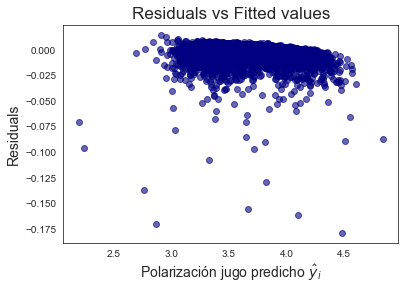

In [52]:
# Residual vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Polarización jugo predicho $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted values', fontsize=17)
plt.show()

In [53]:
mse_sqrt = results.mse_resid
r2_sqrt = results.rsquared
r2a_sqrt = results.rsquared_adj
pd.DataFrame({'R-Squared': [r2_sqrt], 'R-Squared Adjusted': [r2a],'MSE': [mse_sqrt], 'RMSE': [np.sqrt(mse_sqrt)]}, index=[''])

,R-Squared,R-Squared Adjusted,MSE,RMSE
,0.999099,0.998071,0.000045,0.006683


In [54]:
pd.DataFrame({'R-Squared': [r2,r2_sqrt], 'R-Squared Adjusted': [r2a, r2a_sqrt],'MSE': [mse,mse_sqrt], 
              'RMSE': [np.sqrt(mse),np.sqrt(mse_sqrt)]},
             index=['Modelo original', 'Modelo sqrt'])

,R-Squared,R-Squared Adjusted,MSE,RMSE
Modelo original,0.998071,0.998071,0.005250,0.072460
Modelo sqrt,0.999099,0.999098,0.000045,0.006683
